<a href="https://colab.research.google.com/github/marinarhianna/python-tutorials/blob/main/Exoplanet_Work_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Recap 🖨
The cells below define some variables and then use these to print out fact statements.

* Run them in order and see what the output is.

* Change the cells below to describe the exoplanet TOI-700d instead.
Search the web to find its radius and period, and alter the print statements by changing the variables.
NB. Keep note of the radius units!

In [2]:
# define some information about an exoplanet
planet_name = "WASP-5b"
planet_radius = 1.18    # in Jupiter radii
orbital_period = 1.63   # in days

Print out 3 statements below stating the above statistics as part of a sentence.

In [ ]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

In [ ]:
#@title Example Solution
# print out some facts
print("The planet is called", planet_name)
print("Its radius is", planet_radius, "times the radius of Jupiter.")
print("It goes around its star every", orbital_period, "days.")

Now, do some research (Wikipedia, Google, or similar) about some other exoplanets and write your own print statements using variables describing features such as:

* Mass
* Temperature
* Detection method
* Distance from star (also known as semi-major axis)



In [ ]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

# Part 2: Use `lightkurve` to explore real exoplanet data 🪐

`lightkurve` is a Python library of functions used by real astronomers to analyse transit data.

Libraries such as `numpy` are common, and so will be pre-installed on Google Colab and are ready to import into the notebook. `lightkurve` is more niche, so we first need to install it ourselves using a command called `pip` before we can import it. All you need to do is run the cell below and wait for it to install!

In [ ]:
!pip install lightkurve --quiet

In [ ]:
# import libraries
from lightkurve import search_lightcurve
import matplotlib.pyplot as plt

The code below combines different Python concepts we have seen:
* Setting a variable
* Calling a function from a library

Here, we are back-to-backing two functions and creating a variable to store the result, all in one line. The two functions are:
* `search_lightcurve()`
* `download()`

Then we just take the variable we defined and plot it.

In [ ]:
# make a variable for the light curve, search the database, and download a light curve of a known planet
lc = search_lightcurve("Kepler-6", mission='Kepler').download()

# plot the light curve
lc.plot()

* What features do you notice here?
* Estimate the period of the planet by measuring the gaps between each dip in days.

Now, let's clean this up a bit! We want to remove the large upward spikes, as they don't contain useful planetary info and make the dips harder to see. To do this, we need to set a `sigma=` value within the `remove_outliers()` function.
* Try `sigma=` numbers between `10` and `1` and observe what happens to the plot.

Remember, we want to preserve the shape and prominence of the downward dips, but remove the upward ones as much as possible -- try to find the sweet spot!

* Can you think of any possible origin of these upward spikes?

In [ ]:
# removing outliers
new_lc = lc.remove_outliers(sigma=)

# plot the new light curve
new_lc.plot()

Notice how the above code defines a new variable for the light curve and gives it a new name, and sets this equal to the function performing on the old light curve.

Astronomers often change the y-axis units of flux to be normalized, meaning they are centred around a baseline of 1.

Lightkurve has a ready-made function to do this, called `.normalize()`

* Define another new variable for the normalized light curve (name it whatever you like!) and call the `.normalize()` function on the previous light curve produced from the remove outlier step.
* Plot your new light curve.


In [ ]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

If you get stuck, you can see the solution by clicking the blue Show code below.

In [ ]:
# @title Solution:

# implement normalizing function and create new light curve for it
norm_lc = new_lc.normalize()

# plot new light curve
norm_lc.plot()

Astronomers also often fold a light curve over its period to separate the transits from the noise.

Lightkurve has a function for this called `.fold(period)`

To do this:
* Define a variable for the period in days (eg. for Earth, `period = 365`)
* Implement the folding function
* Plot the results.

If the plot doesn't look right, maybe your estimate of the period was a little off (this is normal and common!). If so, the correct period should be 3.23 days.


In [ ]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

In [ ]:
#@title Solution:

# set variable for period
period = 3.23

# implement folding function and create new light curve for it
folded_lc = norm_lc.fold(period)

# plot new light curve
folded_lc.plot()

## Osiris 🪐

HD 209458b is a famous exoplanet in the Pegasus constellation that orbits a solar analog star. Some people informally call it Osiris. The period is 3.52 days.

Let's take a look at it!

* Use the `search_lightcurve` function to download the light curve for `HD 209458`, observed by the `TESS` mission.

In [1]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

In [ ]:
# @title Solution:

# download light curve for HD 209458
lc = search_lightcurve("HD 209458", mission='TESS').download()
lc.plot()

* Do you see any significant upward spike outliers that need to be removed? If so, implement the `remove_outliers` function. If not, you can skip that step.

Notice that the baseline is wavey, as if it is slightly oscillating. Lightkurve also has a function to deal with this, called `.flatten()` which applies a smoothing, or "detrending" filter.

* Try flattening out the light curve by implementing the function in the same way we have done others. If you get stuck, you can check the solution!

In [ ]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

In [ ]:
#@title Solution:
flat_lc = lc.flatten()
flat_lc.plot()

* Phase-fold the flattened curve over the period.

In [ ]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

In [ ]:
#@title Solution:
period = 3.52
fold_lc= flat_lc.fold(period)
fold_lc.plot()

The radius of the star HD 209458 is 1.2 Solar Radii.

Below is an equation which links the depth of the transit dip to the planetary radius and the stellar radius.

Python can be used like a calculator!

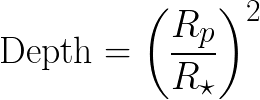

* Calculate the planetary radius in Solar Radii units.
* Then convert this to Jupiter Radii units, where 1 Solar Radius = 9.73 Jupiter Radii.

The depth will be the baseline minus how far down the dip goes.  

Hint: To use a square root in Python, you can import the `numpy` module as `np` and use `np.sqrt()`

In [ ]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

In [ ]:
#@title Example Solution:
import numpy as np

depth = 0.01

radius_ratio = np.sqrt(depth)

planet_radius_solar = radius_ratio * 1.2

planet_radius_jup = planet_radius_solar * 9.73

print("The planetary radius is", planet_radius_jup, "times the radius of Jupiter.")

## ✨ Explore the tools yourself!

Above you have seen various ways to deal with light curve data such as:
* Removing outliers
* Flattening
* Folding
* Normalizing

Not every light curve will need all of these processes, and part of being an astronomer is looking at the raw data and deciding what processing needs to be done to analyse the curve.

Google "NASA Eyes on Exoplanets" and click the first link to take you to a tool which allows you to explore a vast variety of exoplanets.

Play around with the tool and explore any planets that look interesting to you by:
* Confirming the name of the planet
* Checking what instrument it was observed by (Kepler or TESS, or both!)
* Use the search_lightcurve tool to download the data.
* Look at the raw curve and decide what will help to see the transits better.

For example:
* If the baseline is wavey, flatten it!
* If there are many upward spikes, remove the outliers!

Play around with this tool to explore what different light curves look like. Some will be more straightforward, others may be complex and difficult to handle! If you see a lightcurve that looks like a nightmare, feel free to move onto another, or discuss what might be causing the effect.





In [ ]:
###############################
### REPLACE WITH YOUR CODE ###
###############################

Note: The `.flatten()` function will often work on its own, but in some cases it will need extra parameters put inside the brackets. If you are finding that it isn't working the way you want it to, try putting in the brackets:

`.flatten(window_length=101)` or `.flatten(window_length=201)`

If those don't work, you could try other numbers like 301 or even 1001. The window length is how the flattening filter knows to remove trends: a longer window will remove slower trends, while a shorter window will remove faster trends.